# Machine learning on titanic dataset

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="dark")

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [77]:
#Check missing values
train.isnull().sum()

#Clean missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna('Missing', inplace=True)


#Clean missing values for test
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Embarked'].fillna('Missing', inplace=True)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# High level summaries

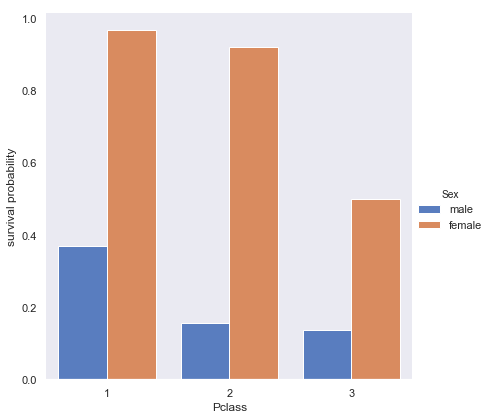

In [55]:
# Examine proportion survived based on characteristics

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

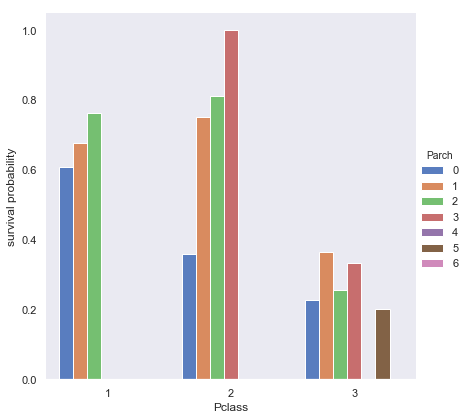

In [56]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Parch", data=train,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

# Classification

In [57]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
train['Sex_ind'] = np.where(train['Sex']=='male', 1, 0)

test['Sex_ind'] = np.where(test['Sex']=='male', 1, 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [79]:
target = ['Survived']
predictors = ['Pclass','Sex_ind','Age','SibSp','Parch','Fare']

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]

In [82]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

In [87]:
# Submission
test['Survived'] = y_pred

results = test[['PassengerId', 'Survived']]

results.to_csv('submission.csv', index=False)